In [1]:
!pip install einops
!pip install denoising_diffusion_pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.1/819.1 kB 9.6 MB/s eta 0:00:00


In [1]:
from diffusion import VPSDE
import torchvision
from matplotlib import pyplot as plt
import torchvision.transforms as transforms
from denoising_diffusion_pytorch import Unet
from diffusion import VPSDE
from torch.utils.data import DataLoader
from torch.optim import Adam
from training import train_score_network_mnist
import torch
from guided_diffusion import Net

In [2]:
device = 'cuda'
data = 'MNIST'
model = Unet(channels = 1, dim = 32).to(device)
model.load_state_dict(torch.load('./epoch49'))
sde = VPSDE(100, 0.1, 20, device = device)

''' hyper params'''
n_epochs =   50
batch_size =  32
lr=1e-4
optimizer = Adam(model.parameters(), lr=lr)

In [3]:
def plot(score_net):
  with torch.no_grad():
    samples = sde.backward_diffusion(score_net, data_shape = (5, 1, 32, 32)).detach().cpu().numpy()
  samples = samples.swapaxes(1,2)
  samples = samples.swapaxes(2,3)
  fig, axe = plt.subplots(5)
  for i in range(5):
      axe[i].imshow(samples[i])
  plt.show()

/content/diffusion.py:129: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = x - (drift - (diffusion**2)*score )*dt + diffusion * torch.sqrt(torch.tensor(dt)) * torch.randn_like(x)


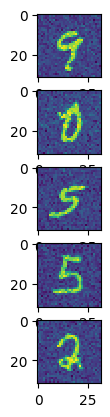

In [4]:
plot(model)

In [5]:
classifier = Net().to(device)
classifier.load_state_dict(torch.load('epoch86'))

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


<All keys matched successfully>

In [10]:
def plot_with_classes(score_net, classifier):

  samples = sde.classifier_guided_backward_diffusion(score_net, classifier, data_shape = (5, 1, 32, 32),
                                     classes = torch.Tensor([0,1,2,3,7]).to(torch.int64).to(device)).detach().cpu().numpy()
  samples = samples.swapaxes(1,2)
  samples = samples.swapaxes(2,3)
  fig, axe = plt.subplots(5)
  for i in range(5):
      axe[i].imshow(samples[i])
  plt.show()

predictions: tensor([1, 8, 7, 1, 1], device='cuda:0')
torch.Size([5, 10]) torch.Size([5, 10])
predictions: tensor([7, 1, 7, 3, 1], device='cuda:0')
torch.Size([5, 10]) torch.Size([5, 10])
predictions: tensor([1, 1, 7, 3, 7], device='cuda:0')
torch.Size([5, 10]) torch.Size([5, 10])
predictions: tensor([1, 1, 7, 3, 7], device='cuda:0')
torch.Size([5, 10]) torch.Size([5, 10])
predictions: tensor([1, 1, 4, 1, 7], device='cuda:0')
torch.Size([5, 10]) torch.Size([5, 10])
predictions: tensor([1, 2, 1, 1, 7], device='cuda:0')
torch.Size([5, 10]) torch.Size([5, 10])
predictions: tensor([1, 1, 1, 1, 7], device='cuda:0')
torch.Size([5, 10]) torch.Size([5, 10])
predictions: tensor([1, 1, 1, 7, 7], device='cuda:0')
torch.Size([5, 10]) torch.Size([5, 10])
predictions: tensor([1, 1, 1, 3, 7], device='cuda:0')
torch.Size([5, 10]) torch.Size([5, 10])
predictions: tensor([7, 9, 1, 3, 7], device='cuda:0')
torch.Size([5, 10]) torch.Size([5, 10])
predictions: tensor([4, 1, 6, 3, 7], device='cuda:0')
torch.

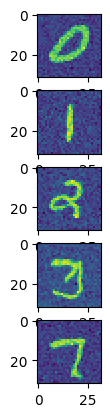

In [11]:
plot_with_classes(model, classifier)

In [ ]:
torch.nn.functional.one_hot(torch.Tensor([5,5,5,5,5]).to(torch.int64).to(device))

NameError: ignored